In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import h5py
from PIL import Image 
from scipy import ndimage 
from lr_utils import load_dataset

* We will write samll-small units of functions and at the end we will integrate all these function into one function that we run the whole network.  
* then we will also observe how our model performed. 

In [4]:
## defining Sigmoid function 

def sigmoid(array): 
    """
    this function will compute the sigmoid of z 
    
    Argument: 
    array -- A scalar or numpy array of any size.
    
    Return: 
    Sig : returns sigmod value sig of the given array 
    """
    return 1/(1 + np.exp(-array))


In [11]:
## creating a function to do forward and backward propagation 

def propagate(weight, bias, X, Y):
    """
    this function calculated the forward and backward propagation 
    
    arguments: 
    weight: weight matrix 
    Bias : bias value 
    X: examples matrix 
    Y: Original label
    
    returns: 
    grads: a dictionary that contains the value of dw and db
    cost: total cost of the function
    """
    m = X.shape[1]
    # forward prop
    A = sigmoid(np.dot(weight.T, X) + bias)
    cost = (-1/m)*(np.sum(Y*np.log(A) + (1-Y)*np.log(1 -A)))
    
    # back prop 
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    ## we put in assert commants to double check shapes of matrix 
    assert(dw.shape == weight.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape ==())
    
    grads = {
        "dw": dw,
        "db": db
    }
    return grads, cost

In [1]:
## optimization step 

def optimize(weight, bias, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    Arguments: 
    weight : the weight matrix 
    Bias : the bias vector 
    X : (n_x, m) matrix of examples 
    Y : the true label 
    num_interations: the number of iterations 
    learning_rate: the learning rate of model 
    print_cost: print the out put ornot 
    
    Returns: 
    params: the parameters 
    grads : the gradients 
    cost : the total cost 
    """
    
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(weight, bias, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        weight = weight - learning_rate*dw
        bias = bias - learning_rate*db
        
        if i% 100 ==0:
            costs.append(cost)
        if print_cost and i % 100 ==0:
            print("costs after itr", i, cost)
            
    params = {
       "w": weight,
        "b":bias
    }
    
    grads = {
        "dw":dw,
        "db":db
    }
    return params, grads, costs

In [2]:
## defigning predict function 

def predict(weight, bias, X):
    """
    Arguments : 
    weight : the weight matrix 
    Bias :  the bias vector 
    X : the (n_x, m) input matrix x 
    
    Returns: 
    Y_prediction : the predicted value of Y
    """
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    weight = weight.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(weight.T, X) + bias)
    
    Y_prediction[A> 0.5] = 1
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [3]:
# now making model using all other function 

def model(Xtrain, Ytrain, Xtest, Ytest, num_iterations = 2000, learning_rate=0.5, print_cost=False):
    """
    Ans: training data 
    Ytrain: true label for training 
    Xtest: Test data 
    Ytest: true label of test data 
    num_iterations: number of iterations 
    learning_rate: the learning rate for gradient descent 
    print_cost: print or not 
    
    Returns: 
    a dictionary D with costs, predictions values, weight, bias, learning rate and number of iterations
    """
    weight, bias = np.zeros((Xtrain.shape[0],1)), 1
    parameters, grads, costs = optimize(weight, bias, Xtrain, Ytrain, num_iterations, learning_rate, print_cost)
    
    weight = parameters["w"]
    bias = parameters["b"]
    
    Y_prediction_test = predict(weight, bias, Xtest)
    Y_prediction_train = predict(weight, bias, Xtrain)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Ytrain)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Ytest)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
    

In [23]:
# data prep and model execution

## data loading 
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

# Standardizing the pixel values.
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)


costs after itr 0 0.9687640798627202
costs after itr 100 0.5789714874697308
costs after itr 200 0.4624055360970962
costs after itr 300 0.37620187443002745
costs after itr 400 0.33486154871619117
costs after itr 500 0.3054435606324983
costs after itr 600 0.28123551128198343
costs after itr 700 0.2608456508982371
costs after itr 800 0.24336322855885917
costs after itr 900 0.22816115812712612
costs after itr 1000 0.21479031493757228
costs after itr 1100 0.2029186419169989
costs after itr 1200 0.19229410325683785
costs after itr 1300 0.1827211291772989
costs after itr 1400 0.17404507857118792
costs after itr 1500 0.16614166757430368
costs after itr 1600 0.15890958370322772
costs after itr 1700 0.15226520587296552
costs after itr 1800 0.14613875309855462
costs after itr 1900 0.14047142453038655
train accuracy: 99.04306220095694 %
test accuracy: 72.0 %


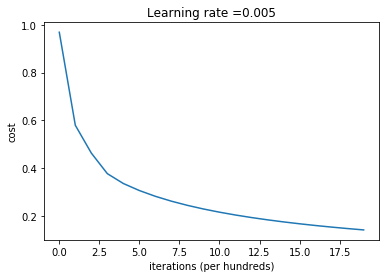

In [26]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.03827751196172 %
test accuracy: 60.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 67.94258373205741 %
test accuracy: 40.0 %

-------------------------------------------------------



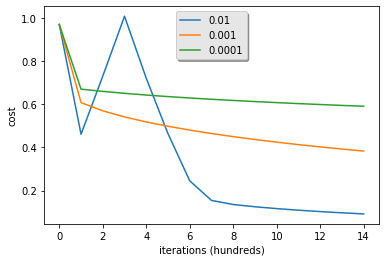

In [27]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

useful references: 
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c